In [11]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)

In [12]:
# Step 2: Set random seed for reproducibility
np.random.seed(42)

# Step 3: Generate synthetic data
n_samples = 1000
hours_studied = np.random.uniform(0, 10, n_samples)

# Define the logistic function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Calculate the probability of passing
# Adjust the coefficients to control the steepness and midpoint of the curve
prob_pass = sigmoid(1.5 * (hours_studied - 5))

# Generate pass/fail outcomes based on the probabilities
pass_fail = np.random.binomial(1, prob_pass)

In [21]:
# Create a DataFrame
df = pd.DataFrame({
    'Hours_Studied': hours_studied,
    'Pass': pass_fail
})
print(df)

     Hours_Studied  Pass
0         3.745401     0
1         9.507143     1
2         7.319939     1
3         5.986585     1
4         1.560186     0
..             ...   ...
995       0.915821     0
996       9.173136     1
997       1.368186     0
998       9.502374     1
999       4.460058     0

[1000 rows x 2 columns]


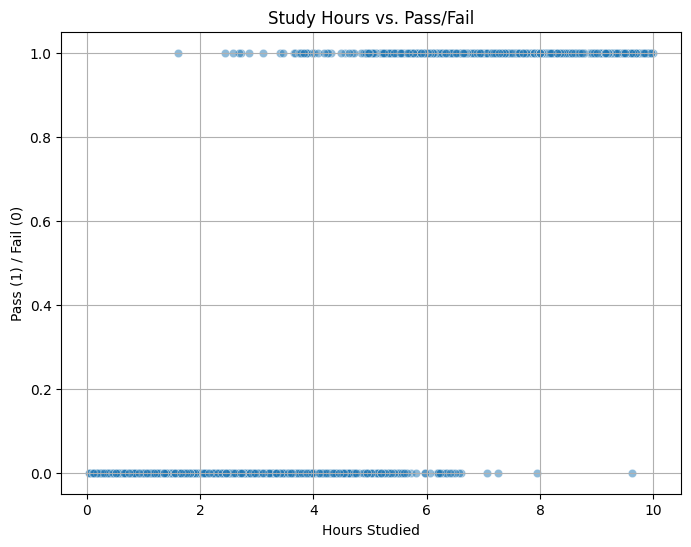

In [22]:
# Step 4: Visualize the data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hours_Studied', y='Pass', data=df, alpha=0.5)
plt.title('Study Hours vs. Pass/Fail')
plt.xlabel('Hours Studied')
plt.ylabel('Pass (1) / Fail (0)')
plt.grid(True)
plt.savefig("plot2.png", format="png")
plt.show()

In [15]:
# Step 5: Prepare features and target
X = df[['Hours_Studied']]
y = df['Pass']


In [16]:
# Step 6: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [17]:
# Step 7: Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [18]:
# Step 8: Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [19]:
# Step 9: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9

Confusion Matrix:
 [[94  9]
 [11 86]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       103
           1       0.91      0.89      0.90        97

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200

